# Clustering the Countries for HELP International - Using K-Means

### Objective:
 - To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
 - HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:
 - HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.
 
 ***Kaggle link***:
 https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\dineth.r\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
pd.set_option('max_colwidth', 800)

In [3]:
# Load datasets
data = pd.read_csv('data/Country-data.csv')
data_dict = pd.read_csv('data/data-dictionary.csv')

In [4]:
data_dict.head(10) # descriptions of 'Country-data.csv' columns

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 1000 live births
2,exports,Exports of goods and services per capita. Given as %age of the GDP per capita
3,health,Total health spending per capita. Given as %age of GDP per capita
4,imports,Imports of goods and services per capita. Given as %age of the GDP per capita
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of the Total GDP
7,life_expec,The average number of years a new born child would live if the current mortality patterns are to remain the same
8,total_fer,The number of children that would be born to each woman if the current age-fertility rates remain the same.
9,gdpp,The GDP per capita. Calculated as the Total GDP divided by the total population.


In [5]:
data.head() # actual dataset

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
# check for missing values
data.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

In [7]:
# drop duplicates
data.drop_duplicates(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


In [9]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Correlation among features

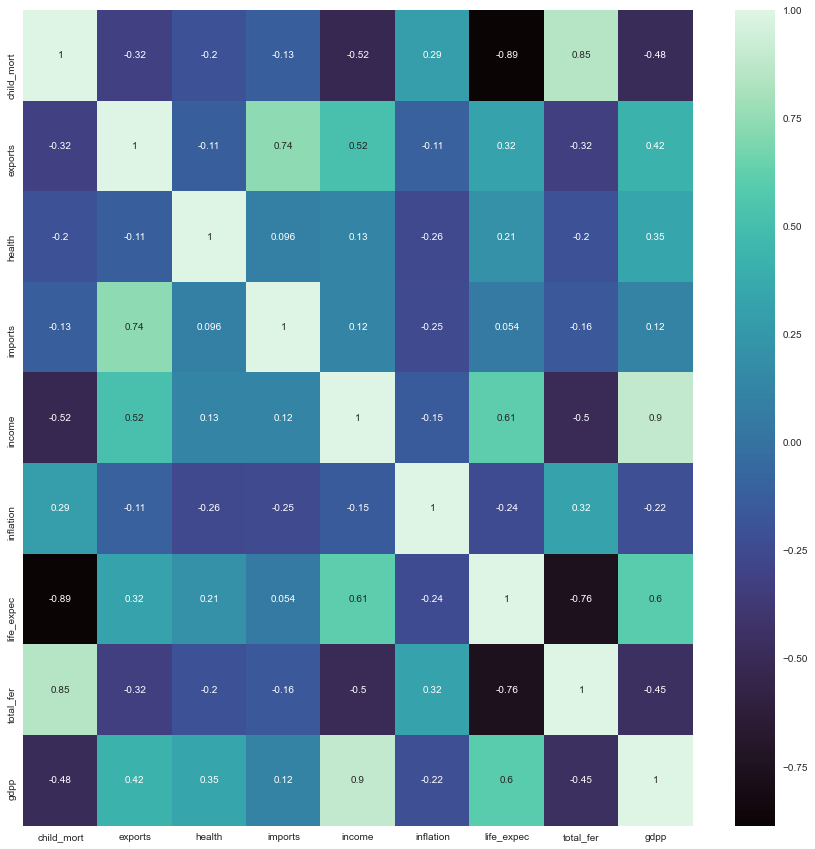

In [10]:
# Lets find correlations among these features
plt.figure(figsize=(15, 15))
sns.heatmap(data.select_dtypes(include='number').corr(), annot = True, cmap = "mako")

### Feature Correlation Evaluation:

 - **Positive corr** - child mortality vs total fertility (**strong**), income vs gdpp (**strong**), imports vs exports, income vs exports, income vs life expectancy, gdpp vs life expectancy
 - **Negetive corr** - child mortality vs life expectancy (**strong**), total fertility vs life expectancy (**strong**), income vs child mortality

***Note***: In problem discussion (https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data/tasks?taskId=1157); 
it is highlighted to compare features **gdpp, child_mort and income** to cluster countries & differentiate the clusters of developed countries from the clusters of under-developed countries.

##### Correlations among highlighted features:
 - gdpp vs child_mort - neg corr (average)
 - gdpp vs income - pos corr (strong)
 - child_mort vs income - neg corr (average)
 
*lets cluster countries based on combinations of highlighted features*: ***gdpp vs child_mort, gdpp & income and child_mort vs income***

#### Feature Engineering
 - drop categorical features
 - scale filtered dataset

In [11]:
# remove categorical feature column "Country"
data = data.drop('country', axis=1)

In [12]:
# To use scaled data for clustering purposes, let's standardize our data
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

In [13]:
scaled_data

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## Apply K-Means clustering
### 1) Finding Optimum clusters using Elbow method

In [14]:
# Using Elbow method to find optimum number of clusters
wcss = [] # within cluster sum of squares
for c in range(1, 11):
    # define kmeans model
    kmeans = KMeans(n_clusters=c, init='k-means++', random_state=42)
    # fit data to k-means model
    kmeans.fit(scaled_data)
    # inertia method returns wcss for the given model
    wcss.append(kmeans.inertia_)

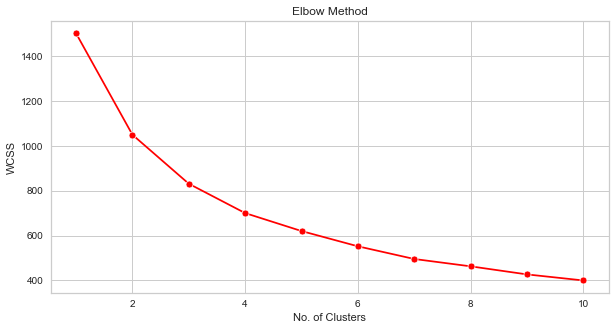

In [32]:
# lets plot wcss vs no. of clusters
plt.figure(figsize=(10,5))
sns.lineplot(range(1,11), wcss, marker='o', color='red')
plt.title('Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

***Number of Optimum clusters is 3 when elbow method is applied***

In [16]:
# Fitting k-means with optimum clusters to the dataset
opt_clusters = 3
kmeans = KMeans(n_clusters=opt_clusters, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [17]:
# cluster centroid in n dimensional feature space
kmeans.cluster_centers_

array([[ 1.36021776, -0.43753313, -0.15598401, -0.18920377, -0.68689408,
         0.40211078, -1.28217981,  1.36494385, -0.60424243],
       [-0.40645337, -0.03165259, -0.2244709 ,  0.02416161, -0.25177041,
        -0.01716742,  0.25473362, -0.42434279, -0.35448141],
       [-0.82744866,  0.64507985,  0.72741122,  0.19063895,  1.48424268,
        -0.48492064,  1.07957853, -0.79187687,  1.61599536]])

In [18]:
# value counts of each cluster label
pd.Series(kmeans.labels_).value_counts()

1    84
0    47
2    36
dtype: int64

### 2) Clustering Validation using Silhouette Coefficient

Silhouette Coefficient is a metric used to calculate the goodness of a clustering technique. Its value ***ranges from 1 to -1***.
 - Closer to 1 : clusters are well apart from each other and clearly distinguished
 - 0 : clusters are indifferent, or we can say that the distance between clusters is not significant
 - Closer to -1 : clusters are assigned in the wrong way
 
$$Silhouette Score = \frac{(b-a)}{max(a,b)}$$<br>
where,<br>
 - a = average intra-cluster distance (the average distance between each point within a cluster)
 - b = average inter-cluster distance (the average distance between all clusters)

In [19]:
from sklearn.metrics import silhouette_score
# calculate Silhouette Coefficients for no. of clusters
sil_scores = {}
for clst in range(2,11): # since Silhouette Coefficient calcualtion include inter-cluster distance, minimum number of clusters is 2
    # define kmeans model
    kmeans_ = KMeans(n_clusters=clst, init='k-means++', random_state=42)
    # fit data to k-means model
    kmeans_.fit(scaled_data)
    # add silhouette score to dict
    sil_scores[clst] = silhouette_score(scaled_data, kmeans_.labels_)

In [20]:
sil_scores

{2: 0.2873566892140671,
 3: 0.28329575683463126,
 4: 0.301375962376881,
 5: 0.2992594995920442,
 6: 0.22733399552463038,
 7: 0.24905003461730515,
 8: 0.23942044336267415,
 9: 0.2305886914073933,
 10: 0.19989164440497506}

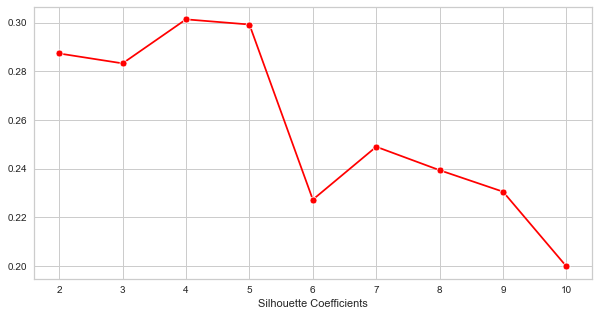

In [21]:
# Plot Silhouette Scores with No. of Clusters
plt.figure(figsize=(10,5))
sns.lineplot(list(sil_scores.keys()), list(sil_scores.values()), marker='o', color='red')
plt.xlabel('No. of Clusters')
plt.xlabel('Silhouette Coefficients')
plt.show()

 - ***Silhouette Score plot shows a high sil score for the selected (from elbow method) optimum Number of clusters which is 3.***
 - ***But 2, 4 and 5 clusters also show good sil scores.***
 - ***Lets evaluate sillouette plots for each clusters to find the optimum number of clusters among these cluster sizes.***

## Sillouette plots for n clusters

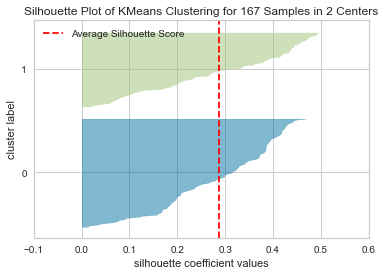

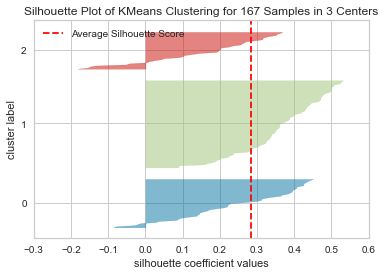

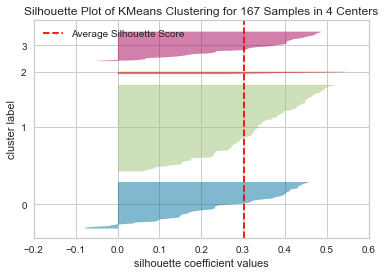

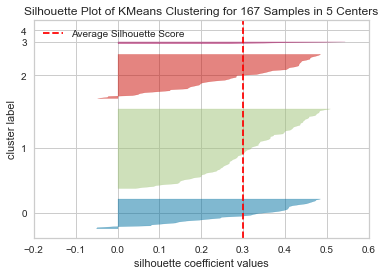

In [22]:
# for clusters with high sil. scores from Silhouette Score plot
clusters = [2,3,4,5]

for cluster in clusters:
    # define kmeans model
    kmeans = KMeans(n_clusters=cluster, init='k-means++', random_state=42)
    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
    # fit the data to model
    visualizer.fit(scaled_data)
    # show the chart
    visualizer.poof()

## Silhouette Plot Analysis

### *What we are looking for*:
 - We want **each** one of the clusters to be **above** the **average silhouette score (optimal)**. **Below average** is considered **sub-optimal**.
 - Ideally, we want each cluster to be **relatively the same width**.
      - try to avoid majotity clusters
      - try to avoid wide fluctuations
 - Additionally **Negetive** silhouette scores represent **outliers** (inbetween 2 decision bounderies).
 
### Analysis of above plots:
1) Plots with **2 and 3 clusters** seems to be the **optimal** ones, as the silhouette score for each cluster is above average silhouette scores. Also, shows similar fluctuations in size. <br>
2) Plots with **4 and 5 clusters** are **suboptimal**, as they exhibit **wide fluctuations in the size of the silhouette plots** (cluster widths), although silhouette scores are above average silhouette scores. <br>
3) Plot with **2 clusters has a majority cluster** and that can be the **deciding point** in selection among 2 and 3 clusters. <br>
4) Interesting observation: Outliers of a single cluster in 3 cluster model, seems to be picked up by the additional cluster in 4 cluster model.

***Conclusion: Model with 3 clusters shows a prominent silhouette plot.***

**Important:**
 - The k-means alogrithm does not give an optimal solution as the problem is not convex (for the optimisation).
 - You may be stuck into local minima, and hence the result of your algorithm depends of your initialization (of your centroids). 
 - A good practice in order to find a good minimum is to **rerun the algorithm** several times with **several initializations** and keep the best result.
 - For that ***random_state*** of the kmeans initialization can be changed on reruns
 
*random_state in KMeans function*,
1. Kmeans++ initialization - Start with same random data point as centroid.
2. random initialization - Start with same K random data points as centroid.

Note: Here fixed random_state is used for results reproducability.

## Cluster Visualizing based on feature pairs

In [23]:
# let's fit and predict the scaled data on the model to get cluster labels
opt_kmeans = KMeans(n_clusters=opt_clusters, init='k-means++', random_state=42)
cluster_labels = opt_kmeans.fit_predict(scaled_data)

In [24]:
# function to visualize clusters on 2D space for given 2 features
def plot_clusters(feature_1, feature_2, feature_1_index, feature_2_index):

    # Slice scaled_data array and create required 2-d array
    scaled_f1, scaled_f2 = scaled_data[:,feature_1_index], scaled_data[:,feature_2_index] # slice required feature columns
    scaled_f1_f2 = np.vstack((scaled_f1, scaled_f2)).T # two 1-d arrays into a 2-d array
    
    plt.figure(figsize=(15,8))
    sns.set_palette(sns.color_palette("husl")) # color_pallete
    
    # data points
    for c in range(opt_clusters):
        sns.scatterplot(scaled_f1_f2[cluster_labels == c, 0], scaled_f1_f2[cluster_labels == c, 1], label='Cluster %s'%c, s=80)

    # cluster centroids
    sns.scatterplot(opt_kmeans.cluster_centers_[:, feature_1_index], opt_kmeans.cluster_centers_[:, feature_2_index], color='red', label='Centroid', s=150, marker='X')

    plt.grid(False)
    plt.title('Clusters of Countries', fontsize=24, fontweight="bold")
    plt.xlabel(feature_1, fontsize=18)
    plt.ylabel(feature_2, fontsize=18)
    plt.legend()
    plt.show()

In [25]:
# To get column indexes
dict = {}
for k in range(0,9):
    dict[k] = data.columns[k]
print(dict)

{0: 'child_mort', 1: 'exports', 2: 'health', 3: 'imports', 4: 'income', 5: 'inflation', 6: 'life_expec', 7: 'total_fer', 8: 'gdpp'}


### Feature Pair 1 - GDPP vs Child Mortality

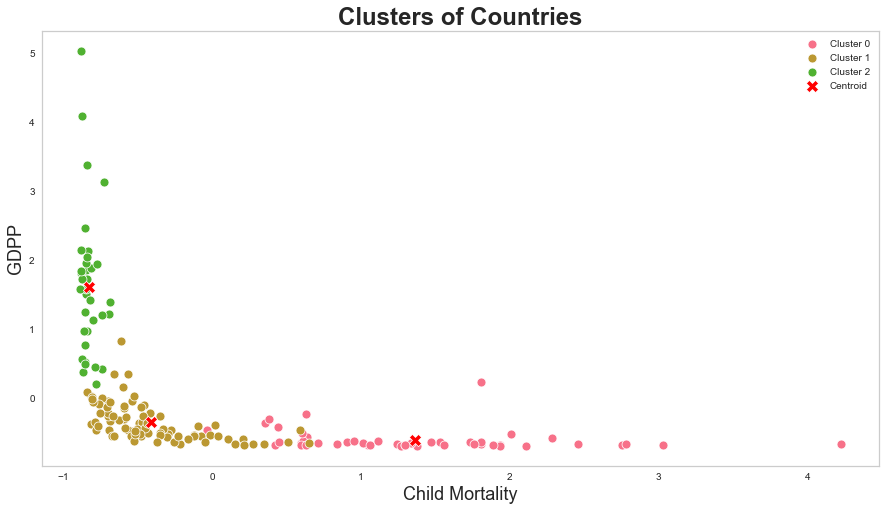

In [26]:
# # GDPP vs Child Mortality
plot_clusters('Child Mortality', 'GDPP', 0, 8)

### Feature Pair 2 - GDPP vs Income

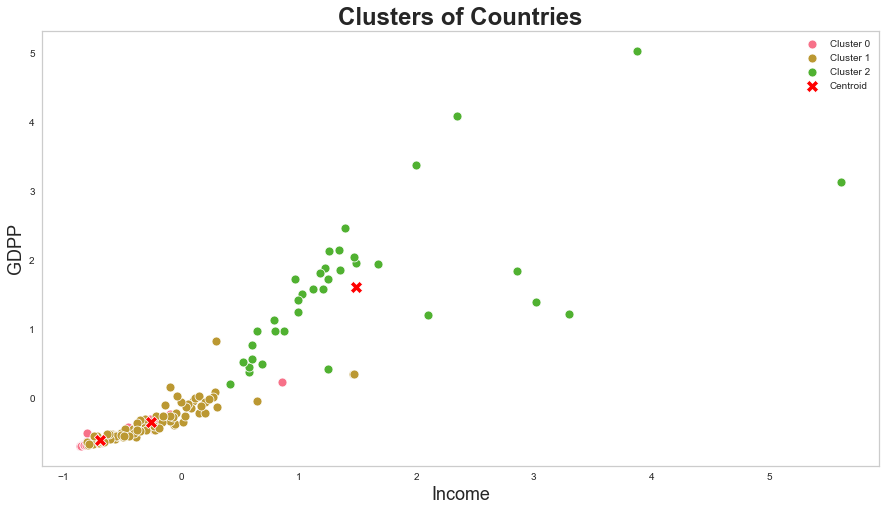

In [27]:
# Income vs GDPP
plot_clusters('Income', 'GDPP', 4, 8)

### Feature Pair 3 - Child Mortality vs Income

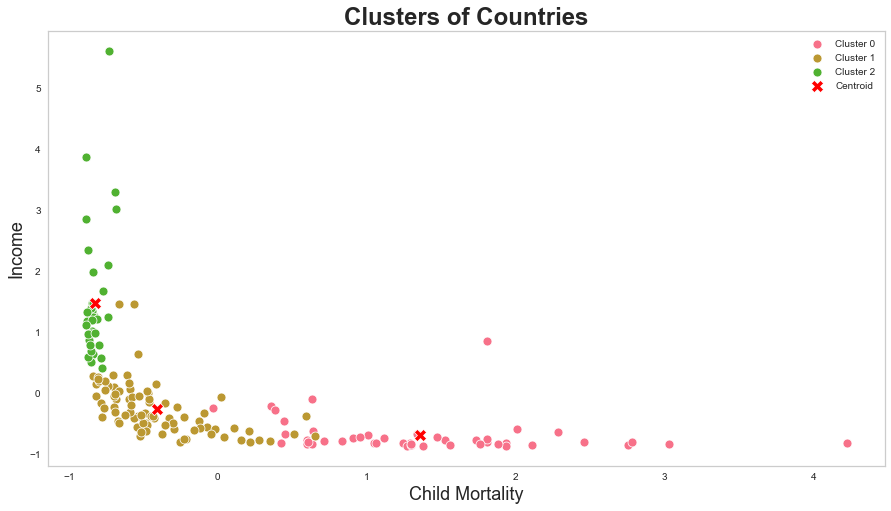

In [28]:
# Child Mortality vs Income
plot_clusters('Child Mortality', 'Income', 0, 4)

### Feature Pair 4 - Import vs Exports

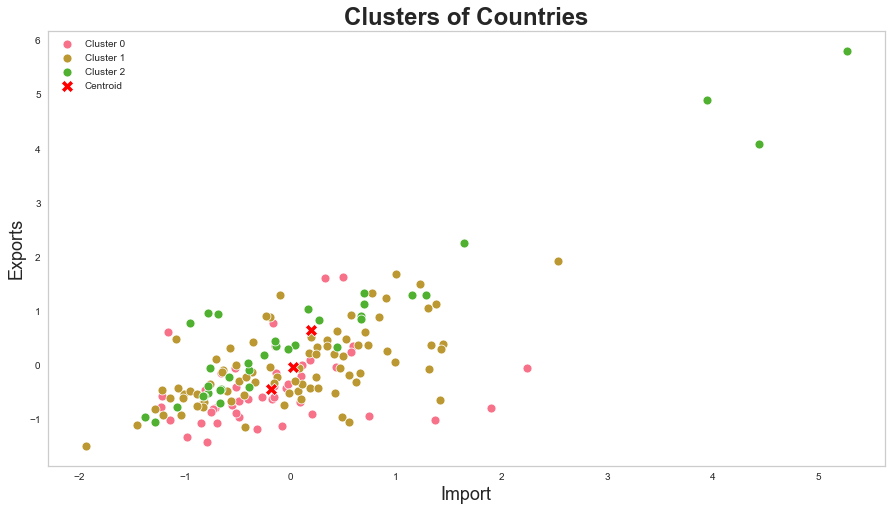

In [29]:
# Import vs Exports
plot_clusters('Import', 'Exports', 3, 1)

### Feature Pair 5 - Inflation vs GDPP

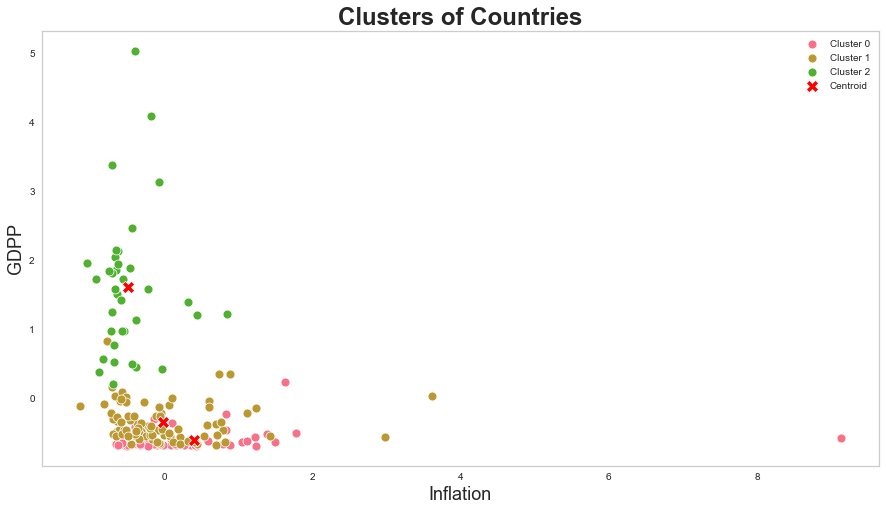

In [30]:
# Inflation vs GDPP
plot_clusters('Inflation', 'GDPP', 5, 8)